In [2]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import pandas as pd

In [181]:
logs = []
with open('analysis_stats.json','r') as file: 
    records = file.read().split('\n')
    print(records)
    for record in records[:-1]:
        logs.append(json.loads(record))

['{"B": [46.879629629629626, 21.412037037037038, 0.08333333333333333, 0.0]}', '{"PE": [10.66820987654321, 4.932098765432099, 0.007716049382716049, 0.0]}', '{"SBOW": [17.381172839506174, 6.0092592592592595, 0.030864197530864196, 102.432915921288]}', '{"DBOW": [38.72952086553323, 17.216383307573416, 0.07264296754250386, 22.93144208037825]}', '{"NWBOW": [21.47222222222222, 17.395061728395063, 0.07561728395061729, 12.595780413561458]}', '{"NWD": [17.36156351791531, 15.986970684039088, 0.07980456026058631, 7.547633681622619]}', '']


In [189]:
# {key: [np.average(time_taken), nobp/len(time_taken), tok/len(time_taken)]}
rows = []
for log in logs: 
    for key in log: 
        rows.append([key, 'avg_time',log[key][0]])
        rows.append([key, 'avg_nobp',log[key][1]])
        rows.append([key, 'avg_ks',log[key][2]*100])
        rows.append([key, 'tapped_suggestions',log[key][3]])

In [183]:
df = pd.DataFrame(rows, columns = ['Interface', 'Metric', 'Value'])
print(df)

   Interface    Metric      Value
0          B  avg_nobp  21.412037
1          B    avg_ks   8.333333
2         PE  avg_nobp   4.932099
3         PE    avg_ks   0.771605
4       SBOW  avg_nobp   6.009259
5       SBOW    avg_ks   3.086420
6       DBOW  avg_nobp  17.216383
7       DBOW    avg_ks   7.264297
8      NWBOW  avg_nobp  17.395062
9      NWBOW    avg_ks   7.561728
10       NWD  avg_nobp  15.986971
11       NWD    avg_ks   7.980456


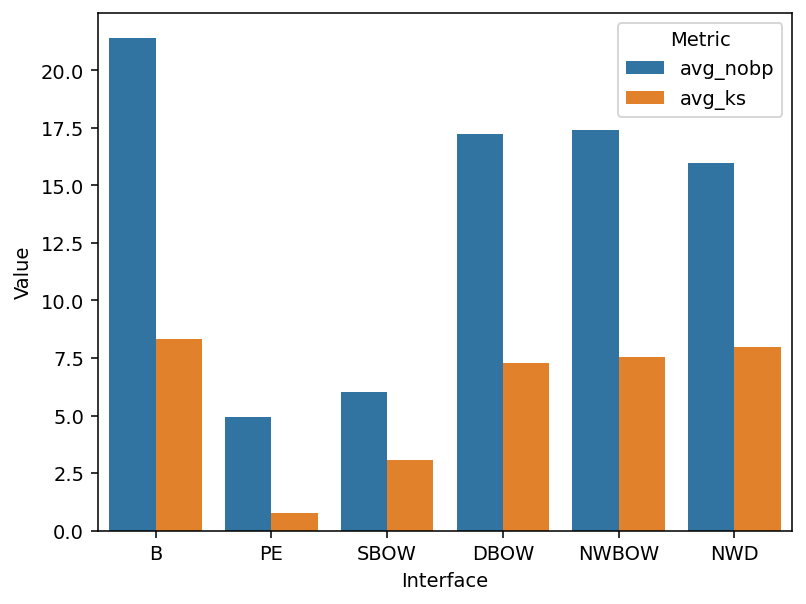

In [184]:
sns.barplot(df, x = 'Interface', y = 'Value', hue = 'Metric', errorbar = 'sd')

In [185]:
print(rows)

[['B', 'avg_nobp', 21.412037037037038], ['B', 'avg_ks', 8.333333333333332], ['PE', 'avg_nobp', 4.932098765432099], ['PE', 'avg_ks', 0.7716049382716049], ['SBOW', 'avg_nobp', 6.0092592592592595], ['SBOW', 'avg_ks', 3.0864197530864197], ['DBOW', 'avg_nobp', 17.216383307573416], ['DBOW', 'avg_ks', 7.2642967542503865], ['NWBOW', 'avg_nobp', 17.395061728395063], ['NWBOW', 'avg_ks', 7.561728395061729], ['NWD', 'avg_nobp', 15.986970684039088], ['NWD', 'avg_ks', 7.980456026058631]]


In [190]:
# {key: [np.average(time_taken), nobp/len(time_taken), tok/len(time_taken), 'tapped_suggestions']}
avg_time, avg_nobp, avg_ks, ts = [],[],[],[]
group_by_metric = []
for row in rows: 
    if row[1] == 'avg_time':
        avg_time.append([row[0], row[2]])
    elif row[1] == 'avg_nobp':
        avg_nobp.append([row[0], row[2]])
    elif row[1] == 'avg_ks':
        avg_ks.append([row[0], row[2]])
    elif row[1] == 'tapped_suggestions':
        ts.append([row[0], row[2]])


In [191]:
adf = pd.DataFrame(avg_time, columns = ['Interface', 'Value'])
bdf = pd.DataFrame(avg_nobp, columns = ['Interface', 'Value'])
cdf = pd.DataFrame(avg_ks, columns = ['Interface', 'Value'])
ddf = pd.DataFrame(ts, columns = ['Interface', 'Value'])

[Text(0, 0, 'B'),
 Text(0, 0, 'PE'),
 Text(0, 0, 'SBOW'),
 Text(0, 0, 'DBOW'),
 Text(0, 0, 'NWBOW'),
 Text(0, 0, 'NWD')]

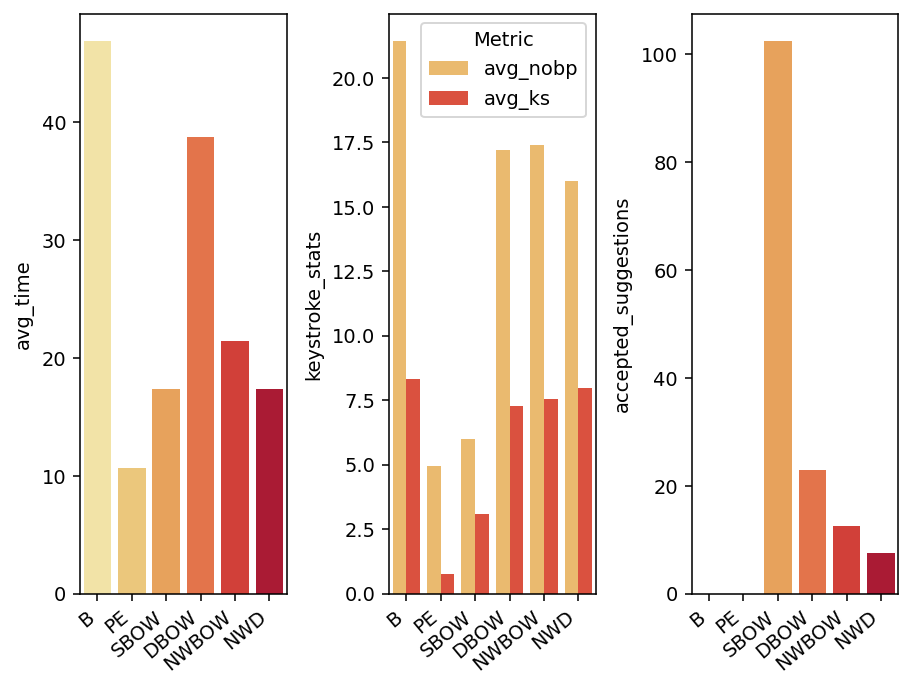

In [192]:
fig, axes = plt.subplots(1, 3, constrained_layout = True)
sns.barplot(data = adf, x='Interface', y = 'Value',  ax=axes[0], palette = 'YlOrRd')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
axes[0].set(ylabel='avg_time', xlabel='')
sns.barplot(df, x = 'Interface', y = 'Value', hue = 'Metric', ax = axes[1], palette = 'YlOrRd')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")
axes[1].set(ylabel='keystroke_stats', xlabel='')
sns.barplot(data = ddf, x='Interface', y = 'Value',  ax=axes[2],palette = 'YlOrRd')
axes[2].set(ylabel='accepted_suggestions', xlabel='')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

In [138]:
import plotly.graph_objects as go

In [139]:
fig = go.Figure()

In [140]:
adf

,Interface,Value
0,B,46.879630
1,PE,10.668210
2,SBOW,17.381173
3,DBOW,38.729521
4,NWBOW,21.472222
5,NWD,17.361564
6,B,46.879630
7,PE,10.668210
8,SBOW,17.381173
9,DBOW,38.729521


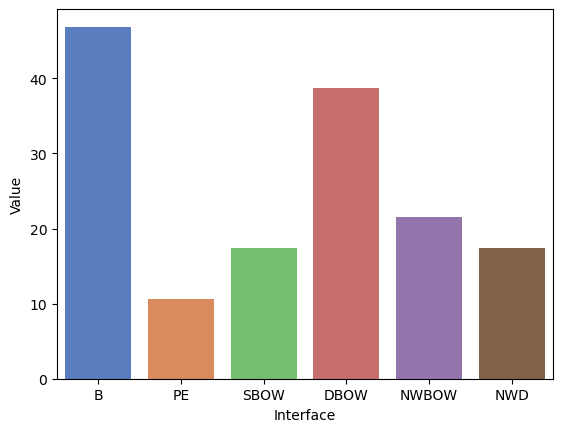

In [81]:
sns.barplot(gbm_df, x = 'Interface', y = '', palette = 'muted')

In [76]:
rows = [] 
for log in logs: 
    print(log)
    for key in log: 
        print(key)
        rows.append([key, log[key][0], log[key][1], log[key][2]])

{'B': [46.879629629629626, 21.412037037037038, 0.08333333333333333, 0.0]}
B
{'PE': [10.66820987654321, 4.932098765432099, 0.007716049382716049, 0.0]}
PE
{'SBOW': [17.381172839506174, 6.0092592592592595, 0.030864197530864196, 102.432915921288]}
SBOW
{'DBOW': [38.72952086553323, 17.216383307573416, 0.07264296754250386, 22.93144208037825]}
DBOW
{'NWBOW': [21.47222222222222, 17.395061728395063, 0.07561728395061729, 12.595780413561458]}
NWBOW
{'NWD': [17.36156351791531, 15.986970684039088, 0.07980456026058631, 7.547633681622619]}
NWD


In [77]:
df = pd.DataFrame(rows, columns = ['Interface', 'avg_time', 'avg_nobp', 'avg_ks'])
df

,Interface,avg_time,avg_nobp,avg_ks
0,B,46.879630,21.412037,0.083333
1,PE,10.668210,4.932099,0.007716
2,SBOW,17.381173,6.009259,0.030864
3,DBOW,38.729521,17.216383,0.072643
4,NWBOW,21.472222,17.395062,0.075617
5,NWD,17.361564,15.986971,0.079805


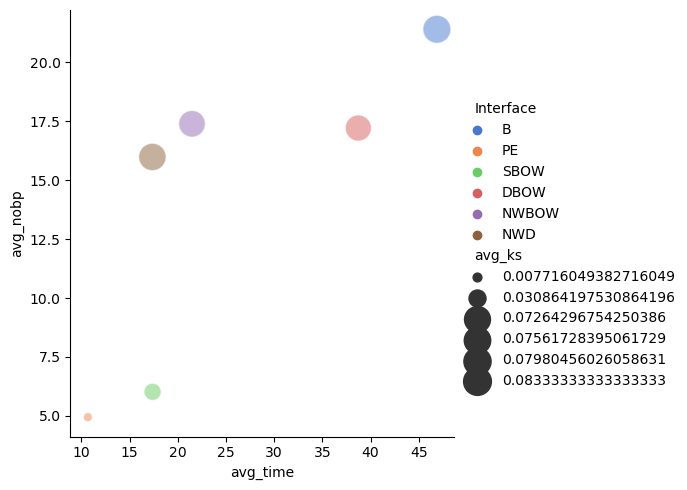

In [80]:
# plt.rcParams['text.usetex'] = False

# sns.relplot(x="avg_time", y="avg_nobp", hue="Interface", size="avg_ks",
#             sizes=(40, 400), alpha=.5, palette="muted",
#              data=df)

In [1]:
# Plotting the pair-wise bleu 

base = [100, 44.5, 45.9, 45, 46.6, 42.9]
pe = [44.5, 100, 82.1, 44.7, 45.8, 42.3]
sbow = [45.3, 82.9, 100, 45.1, 46.2, 43.4]
dbow = [45.8, 46.5, 46.5, 100, 46.4, 44.7]
nwbow = [45.9, 46.2, 46.2, 44.9, 100, 43.4]
nwd = [46, 46.5, 47.2, 47.1, 47.2, 100]


In [18]:
combined = [base, pe, sbow, dbow, nwbow, nwd]
print(combined)

[[100, 44.5, 45.9, 45, 46.6, 42.9], [44.5, 100, 82.1, 44.7, 45.8, 42.3], [45.3, 82.9, 100, 45.1, 46.2, 43.4], [45.8, 46.5, 46.5, 100, 46.4, 44.7], [45.9, 46.2, 46.2, 44.9, 100, 43.4], [46, 46.5, 47.2, 47.1, 47.2, 100]]


In [30]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180

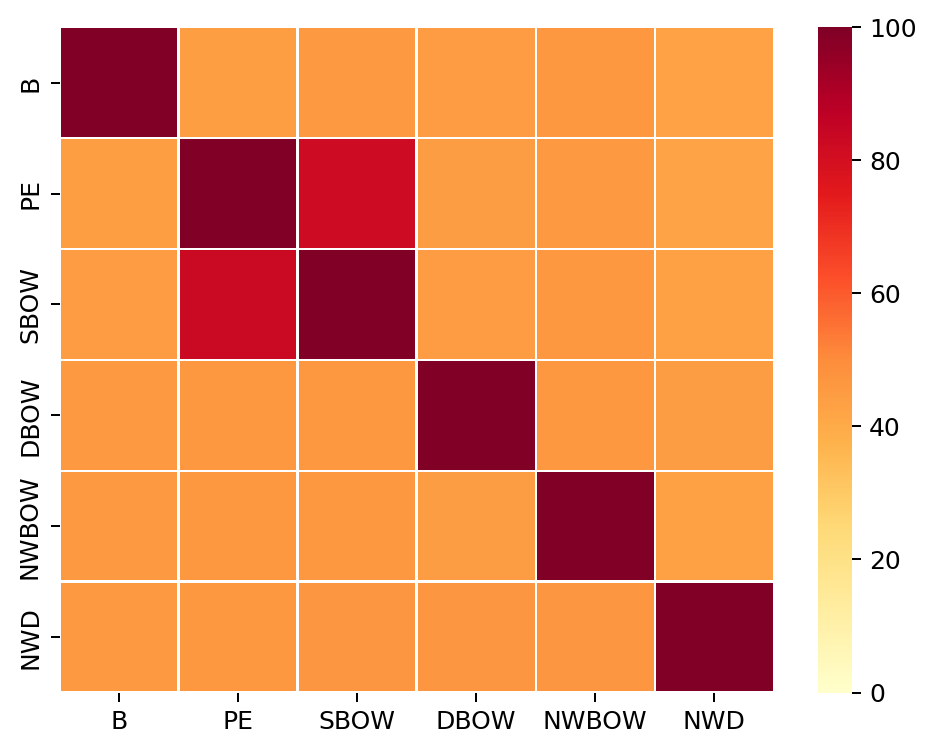

In [31]:
x_axis_labels = ['B', 'PE', 'SBOW', 'DBOW', 'NWBOW', 'NWD']
y_axis_labels = ['B', 'PE', 'SBOW', 'DBOW', 'NWBOW', 'NWD']
sns.heatmap(combined, cmap = 'YlOrRd', vmin = 0, linewidth = .5, xticklabels = x_axis_labels, yticklabels = y_axis_labels)

In [ ]:
# visualizing demographics 


In [35]:
never = 1
lessthan2 = 8
lessthan15 = 6
morethan15 = 3
values = [never, lessthan2, lessthan15, morethan15]

In [50]:
hrs = ['Never','Less Than 2','Less than 15','More than 15']
people = [1,8,6,3]

[Text(0, 0.5, 'Number of Annotators'),
 Text(0.5, 0, 'Number of Hours of Keyboard Usage')]

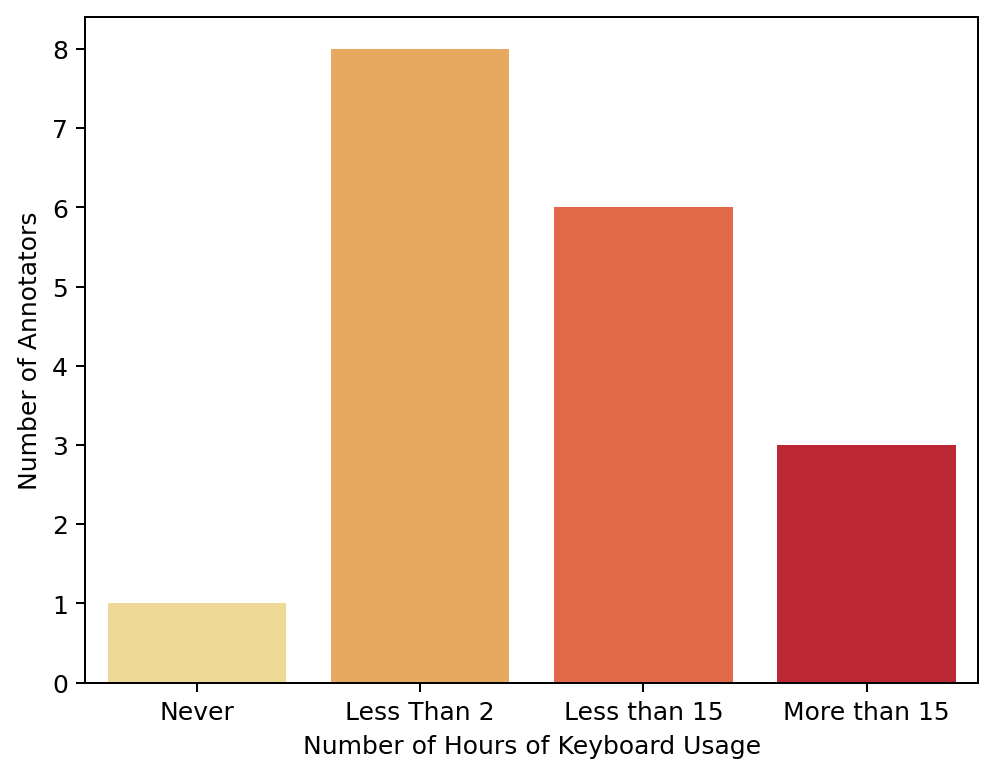

In [68]:
fig = sns.barplot(x = hrs, y = people,palette = 'YlOrRd')
fig.set(xlabel = 'Number of Hours of Keyboard Usage', ylabel = 'Number of Annotators')
# fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")